script to compare in several region the skill of the SST from MF operational system  and the skill of the triatlas hindcast in a given region for the May startdate, Might need some adaptation for november startdate.

In [5]:
#import matplotlib
#matplotlib.use('Agg') # to run on aneto (not very useful for this script)
from function_read import *
#other libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import scipy.stats
import cartopy as cart
import cartopy.crs as ccrs
from function_read import *
from mpl_toolkits.axisartist.axislines import Subplot 
import sys

# name of the experience
exp="dcppA-hincast"


#period to analyse
year1=1998
year2=2014
#number of months of the hindcast to read
nmon=6
#number of members
nmemb=10
#starting month of the hindcast (may:5 or November:11)
monstart=5

varname="tos"
level="all"

regname="Nino34"
lat_bnds = [-5,5]
lon_bnds = [360-170,360-120]
#lon_bnds = [-180,-120]

regname="Atl3"
lat_bnds = [-3,3]
lon_bnds = [-20,-1]

prefixe="/home/prodhommec"

scaledict = {"tos":1, "bigthetao":1,"chlos":1e3, "o2":1e3, "no3os":1e3, "intpp":12*1000*3600*24 }
scale=scaledict.get(varname)

In [6]:
#compute dates from year1 and year2
nyear=year2-year1+1
yearlst=np.arange(year1, year2+1)
sdatelst=[]
for year in yearlst:
    sdatelst.append(date(year=year, month=monstart, day=1))

### Read files: hindcasts

In [7]:
# list to be converted in array to store the data
varMM=[]
# list to store the missing members
# additional comment: in the test simulation I was investigating a few members where missing; I replace them
# by the members 5 this should be remove when the dataset will be complete
missing=[]
#loop over members
for imemb in range(1,nmemb+1):
    moddate=[]
    for s in sdatelst:
        #f=glob("/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%imemb+varname+"*gn_"+s.strftime("%Y%m")+"*04.nc")
        f=glob(prefixe+"/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%imemb+varname+"_Omon**"+s.strftime("%Y%m")+"*")
        # as said before if the member is missing use the member 5 (to be removed with a complete dataset)
        if len(f)==0:
            f=glob(prefixe+"/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%(5)+varname+"_Omon*"+s.strftime("%Y%m")+"*")
            missing.append((s,imemb))
        f=f[0] 
        #extract level in cas of 3D files
        if level!="all":
            f=cdo.selvar(varname, input=f)
            f=cdo.sellevidx(level, input=f)
            f=cdo.vertmean(input=f)
        #    print(f)
        #interpolation to 1x1 degree grid 
        f=cdo.remapbil("r360x180", input=f)
        varf=netCDF4.Dataset(f)
        #extract array from fonction read (the fonction would need adaptation to work directly on the NEMO grid)
        mod, latobs, lonobs  = extract_array(varf, varname, nmon, lon_bnds, lat_bnds, level="all")
        #mask land
        mod=np.ma.array(mod, mask=mod>1e10)
        #average over the region (from function read)
        mod = area_av(mod, 1, 2, latobs, lonobs)
        moddate.append(mod)
        
    varMM.append(np.ma.array(moddate))
    
varMM=np.ma.array(varMM)*scale

all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


In [11]:
print(prefixe+"/cnrm/pastel/DATA/sys8/series/ts/HE/PASTEL_H"+s.strftime("%Y")+membstr+"*6hourly_ts_"+s.strftime("%Y")+"*")

/home/prodhommec/cnrm/pastel/DATA/sys8/series/ts/HE/PASTEL_H1998E001*6hourly_ts_1998*


In [12]:
# list to be converted in array to store the data
varMMS7=[]
for imemb in range(1,nmemb+1):
    membstr="E%03d"%imemb
    print(membstr)
    moddate=[]
    for s in sdatelst:
        #hindcasts from system 8 HE: May startdate HK: November
        f=glob("/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/sys8/series/ts/HE/PASTEL_H"+s.strftime("%Y")+membstr+"*6hourly_ts_"+s.strftime("%Y")+"*")
        #f=glob("/cnrm/pastel/DATA/sys8/series/ts/HE/PASTEL_H"+s.strftime("%Y")+membstr+"*6hourly_ts_"+s.strftime("%Y")+"*")
 
        #remove lasts days of April (present due to the lagged initialisation stategy)
        #to gain time the monthly data could be stored somewhere
        f=cdo.monmean(input="-selmon,5,6,7,8,9,10 "+f[0])
        f=cdo.remapbil("r360x180", input=f)
        varf=netCDF4.Dataset(f)

        #extract array from fonction read 
        mod, latobs, lonobs  = extract_array(varf, "ts", nmon, lon_bnds, lat_bnds, level="all")
        mod = area_av(mod, 1, 2, latobs, lonobs)
        moddate.append(mod)
        
    varMMS7.append(np.array(moddate))
    
varMMS7=np.array(varMMS7)

E001
all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E002


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E003


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E004


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E005


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E006


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E007


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E008


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E009


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)
E010


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-20  -1]
3
I am here
1
(6, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


### Read files: observations

In [15]:
fileobs = prefixe+"/cnrm/pastel/USERS/prodhommec/NO_SAVE/obs/ersst-v4_185401-201612.nc"
fileobs=cdo.remapbil("r360x180", input=fileobs)
varfobs=netCDF4.Dataset(fileobs)
#varfobs.variables
obs, latobs, lonobs  = extract_array(varfobs, "sst", (yearlst[-1]-1854+2)*12, lon_bnds, lat_bnds, level="all")

obs = area_av(obs[((yearlst[0]-1854)*12):,0,:,:], 1, 2, latobs, lonobs)

all
True [-20  -1]
4
I am here
1
(1944, 1, 6, 20)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


### Analysis

In [16]:
# transform obervation to have data organized following (nyear, 12, nlon, nlat)
indexobsresh = obs.reshape((year2-year1+2),12)


#compute climatologies
climmod=np.mean(varMM, axis=(0,1))
climobs = np.mean(indexobsresh, axis = 0)
clims7 = np.mean(varMMS7, axis = (0,1))

#compute anomalies 
#additional note: This should be done in cross-validation for this preliminary analysis it's not done
# you can use the fonction from forecast_veri
anomS7 = varMMS7-extend_table(clims7, [1, (year2-year1+1)])
anom = varMM-extend_table(climmod, [1, (year2-year1+1)])
anomobs = np.ndarray.flatten(indexobsresh - climobs)


In [17]:
obsreorghind=obs[(monstart-1):((monstart-1)+(nyear)*12)].reshape(nyear, 12)
corr=[]
for imon in range(nmon):
    corr.append(scipy.stats.pearsonr(np.mean(anom, axis=0)[:,imon], obsreorghind[:,imon]))
corr=np.array(corr)

In [18]:
corrS7=[]
for imon in range(nmon):
    corrS7.append(scipy.stats.pearsonr(np.mean(anomS7, axis=0)[:,imon], obsreorghind[:,imon]))
corrS7=np.array(corrS7)

### Plots

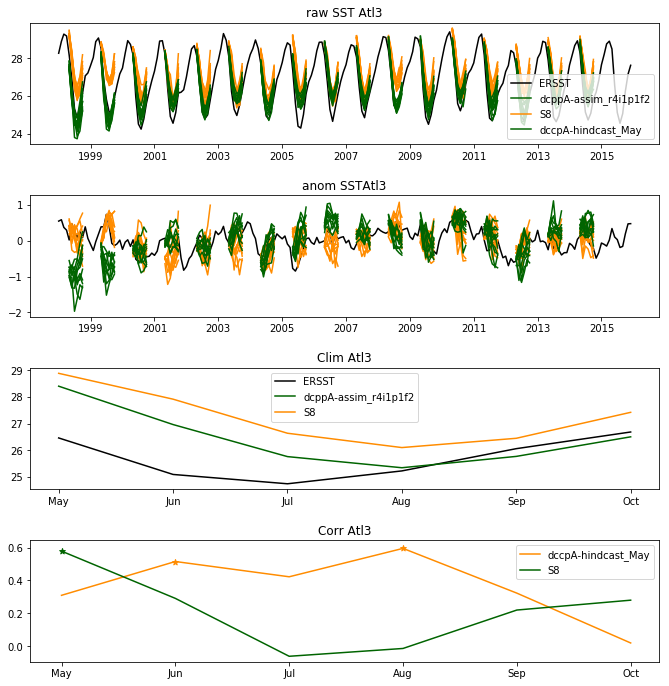

In [21]:
nline=4
ncol=1

fig, ax = plt.subplots(ncols=ncol, nrows=nline, 
                        figsize=(10, 10))

plt.tight_layout(pad=3)

obssdatelst=[]
for year in np.arange(year1,year2+2):
    for mon in range(1, 13):
        obssdatelst.append(date(year=year, month=mon, day=1))

        
        
        
obssdatelst=[]
for year in np.arange(year1,year2+2):
    for mon in range(1, 13):
        obssdatelst.append(date(year=year, month=mon, day=1))

ax[0].plot(obssdatelst, obs, color="black")


for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))
    
    ax[0].plot(modsdatelst, np.ndarray.flatten(varMMS7[0,isdates,:]), color="darkgreen")
    ax[0].plot(modsdatelst, np.ndarray.flatten(varMM[0,isdates,:]), color="darkorange")
        
        
for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))

    for imemb in range(nmemb):
        ax[0].plot(modsdatelst, np.ndarray.flatten(varMM[imemb,isdates,:]), color="darkorange")
ax[0].set_title("raw SST "+regname)
    
for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))
    #plt.plot(modsdatelsts7, np.ndarray.flatten(indexSYS7[isdates*12:isdates*12+6]), color="green")    
    for imemb in range(nmemb):
        ax[0].plot(modsdatelst, np.ndarray.flatten(varMMS7[imemb,isdates,:]), color="darkgreen")
        

ax[0].legend(["ERSST", "dcppA-assim_r4i1p1f2", "S8", "dccpA-hindcast_May"])

        
ax[1].plot(obssdatelst, anomobs, color="black")
#ax[1].plot(obssdatelst[:(year2-year1+1)*12], anomfor, color="blue")

for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))
    
    for imemb in range(nmemb):
        ax[1].plot(modsdatelst, np.ndarray.flatten(anom[imemb,isdates,:]), color="darkorange")
ax[1].set_title("anom SST"+regname)

    
for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))
    
    
    for imemb in range(nmemb):
        ax[1].plot(modsdatelst, np.ndarray.flatten(anomS7[imemb,isdates,:]), color="darkgreen")

        

        

ax[2].plot([s.strftime("%b") for s in modsdatelst], climobs[monstart:(monstart+nmon)], color="black")
#ax[2].plot([s.strftime("%b") for s in modsdatelst], climfor[monstart:(monstart+nmon)], color="blue")
ax[2].plot([s.strftime("%b") for s in modsdatelst], clims7, color="darkgreen")
ax[2].plot([s.strftime("%b") for s in modsdatelst], climmod, color="darkorange")

ax[2].set_title("Clim "+regname)

ax[2].legend(["ERSST", "dcppA-assim_r4i1p1f2", "S8", "dccpA-hindcast_May"])
        
        

ax[3].plot([s.strftime("%b") for s in modsdatelst], corr[:,0], color="darkorange")
for imon in range(nmon):
    if corr[imon,1]<0.05:
        ax[3].scatter(modsdatelst[imon].strftime("%b"), corr[imon,0], marker="*", color="darkorange")



ax[3].plot([s.strftime("%b") for s in modsdatelst], corrS7[:,0], color="darkgreen")
for imon in range(nmon):
    if corrS7[imon,1]<0.05:
        ax[3].scatter(modsdatelst[imon].strftime("%b"), corrS7[imon,0], marker="*", color="darkgreen")
ax[3].set_title("Corr "+regname)

ax[3].legend([ "dccpA-hindcast_May", "S8"])

